<a href="https://colab.research.google.com/github/fduartej/data_visualization_python/blob/main/notebook/CorrupcionPercepcionIndex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analisis de Datos de Corruption perceptions index (cpi) ranks countries/territories**

In [1]:
!apt-get -qq install -y libarchive-dev && pip install -U libarchive 
import libarchive 

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 123991 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.2.2-3.1ubuntu0.7_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Setting up libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 14.0 MB/s 
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31648 sha256=80ade60044fe5bc5ef7697455096ee837d7418d73215bdd652f0c419f312e660
  Stored in directory: /root/.cache/pip/wheels/63/b1/c6/b3da79bec2012175bd43603eed98ef8548ac1733b77c1d4330
Successfully built libarchive


In [2]:
!apt-get -qq install -y graphviz && pip install pydot 
import pydot 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install cartopy 
import cartopy 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 23.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 47.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 64.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 54.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 50.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 46 kB 4.5 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37

In [4]:
!pip install chart_studio 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.9 MB/s 


In [5]:
!pip install plotly==5.8.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 6.1 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [6]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 25.1 MB/s 
     |████████████████████████████████| 6.3 MB 49.6 MB/s 
     |████████████████████████████████| 16.7 MB 39.8 MB/s 


In [7]:
import plotly
plotly.__version__

'5.8.2'

In [44]:
import numpy as np
import pandas as pd
import chart_studio.plotly as py
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as pyo
import seaborn as sns
import plotly.express as px
import cufflinks as cf
import plotly.graph_objects as go

%matplotlib inline

# Import seaborn
cpi = pd.read_csv('cpi.csv')
cpi = cpi.rename(columns={"Jurisdiction": "Country"})

countrycode = pd.read_csv('country_code.csv',delimiter=";")

In [45]:
cpi.head()

,Country,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,-,-,-,-,-,-,-,2.5,-,1.8,1.5,1.3,1.4,1.52,8,8,12,11
1,Albania,-,2.3,-,-,2.5,2.5,2.5,2.4,2.6,2.9,3.4,3.2,3.3,3.05,33,31,33,36
2,Algeria,-,-,-,-,-,2.6,2.7,2.8,3.1,3,3.2,2.8,2.9,2.9,34,36,36,36
3,Angola,-,-,1.7,-,1.7,1.8,2,2,2.2,2.2,1.9,1.9,1.9,2.01,22,23,19,15
4,Argentina,3,3,3.5,3.5,2.8,2.5,2.5,2.8,2.9,2.9,2.9,2.9,2.9,3,35,34,34,32


In [46]:
countrycode.head()

,Country,Alpha-2,Alpha-3
0,Afghanistan,AF,AFG
1,Albania,AL,ALB
2,Algeria,DZ,DZA
3,American Samoa,AS,ASM
4,Andorra,AD,AND


In [48]:
cpi = pd.merge(cpi,countrycode, on='Country')

In [51]:
# Paises de la union europea
# Alemania, Bélgica, Croacia, Dinamarca, España, Francia, Irlanda, Letonia, Luxemburgo, Países Bajos, Suecia, Bulgaria, Eslovaquia,
# Estonia, Grecia, Malta, Polonia, República Checa, Austria, Chipre, Eslovenia, Finlandia, Hungría, Italia, Lituania, Portugal y Rumanía

cpiEuropa = cpi[(cpi.Country == 'Germany') | (cpi.Country =='Belgium') | (cpi.Country =='Croatia') |
     (cpi.Country =='Denmark') | (cpi.Country =='Spain') | (cpi.Country =='France') |
     (cpi.Country =='Irland') | (cpi.Country =='Latvia') | (cpi.Country =='Luxemburgo') |
     (cpi.Country =='Netherlands') | (cpi.Country =='Sweden') | (cpi.Country =='Bulgaria') | 
     (cpi.Country =='Slovakia') | (cpi.Country =='Estonia') | (cpi.Country =='Greece') | 
     (cpi.Country =='Malta') | (cpi.Country =='Poland') | (cpi.Country =='Czechia') | 
     (cpi.Country =='Austria') | (cpi.Country =='Cyprus') | (cpi.Country =='Slovenia') | 
     (cpi.Country =='Finland') | (cpi.Country =='Hungary') | (cpi.Country =='Italy') | 
     (cpi.Country =='Lithuania') | (cpi.Country =='Portugal') | (cpi.Country =='Romania') 
    ] 

#cpiEuropa = cpiEuropa.reset_index(drop=True).set_index('Jurisdiction')
cpiEuropa = cpiEuropa[['Country','Alpha-3','2011','2012','2013','2014','2015']]
cpiEuropa


,Country,Alpha-3,2011,2012,2013,2014,2015
7,Austria,AUT,7.79,69,69,72,76
13,Belgium,BEL,7.49,75,75,76,77
21,Bulgaria,BGR,3.33,41,41,43,41
32,Croatia,HRV,4.03,46,48,48,51
34,Cyprus,CYP,6.27,66,63,63,61
35,Denmark,DNK,9.39,90,91,92,91
43,Estonia,EST,6.35,64,68,69,70
46,Finland,FIN,9.4,90,89,89,90
47,France,FRA,7.01,71,71,69,70
50,Germany,DEU,8.05,79,78,79,81


In [52]:
# https://stackoverflow.com/questions/64949449/plotting-line-graph-for-3-variables-in-python

#cpiEuropa['2005'] = cpiEuropa['2005'].astype(float)
#cpiEuropa['2006'] = cpiEuropa['2006'].astype(float)
#cpiEuropa['2007'] = cpiEuropa['2007'].astype(float)
#cpiEuropa['2008'] = cpiEuropa['2008'].astype(float)
#cpiEuropa['2009'] = cpiEuropa['2009'].astype(float)
#cpiEuropa['2010'] = cpiEuropa['2010'].astype(float)
cpiEuropa['2011'] = cpiEuropa['2011'].astype(float)
cpiEuropa['2012'] = cpiEuropa['2012'].astype(float)
cpiEuropa['2013'] = cpiEuropa['2013'].astype(float)
cpiEuropa['2014'] = cpiEuropa['2014'].astype(float)
cpiEuropa['2015'] = cpiEuropa['2015'].astype(float)

#cpiEuropa.info()


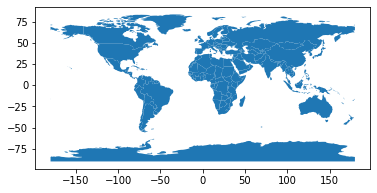

In [13]:
## TODO: Mapita
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.columns=['pop_est', 'continent', 'name', 'Alpha-3', 'gdp_md_est', 'geometry']

merge=pd.merge(world,cpiEuropa,on='Alpha-3')

world.head()

world.plot();


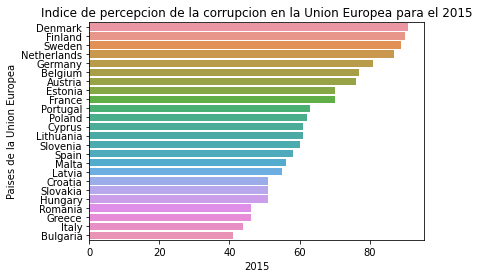

In [15]:
sns.barplot(
    x="2015", 
    y="Jurisdiction", 
    data=cpiEuropa,
    order=cpiEuropa.sort_values('2015',ascending = False).Jurisdiction)

## TODO: Agregar los colores 

plt.ylabel("Paises de la Union Europea")
plt.title("Indice de percepcion de la corrupcion en la Union Europea para el 2015")

plt.show()

#comparar solo 2 años donde hay un
#coger un mapa para un año especifico y comparar para los graficos de pendientes (facets)

In [16]:
# Crecimiento de la Corrupción en los últimos 5 años (animacion)
cpiEuropaWIndex = cpiEuropa.reset_index(drop=True).set_index('Jurisdiction')
cpiEuropa

,Jurisdiction,2012,2013,2014,2015
7,Austria,69.0,69.0,72.0,76.0
14,Belgium,75.0,75.0,76.0,77.0
26,Bulgaria,41.0,41.0,43.0,41.0
54,Croatia,46.0,48.0,48.0,51.0
56,Cyprus,66.0,63.0,63.0,61.0
62,Denmark,90.0,91.0,92.0,91.0
73,Estonia,64.0,68.0,69.0,70.0
76,Finland,90.0,89.0,89.0,90.0
77,France,71.0,71.0,69.0,70.0
82,Germany,79.0,78.0,79.0,81.0


In [17]:
newCpi = cpiEuropa.melt(id_vars=["Jurisdiction"], 
        var_name="Annio", 
        value_name="Cpi")

newCpi = newCpi.sort_values(by=['Jurisdiction', 'Annio'], ascending=True)
newCpi

,Jurisdiction,Annio,Cpi
0,Austria,2012,69.0
24,Austria,2013,69.0
48,Austria,2014,72.0
72,Austria,2015,76.0
1,Belgium,2012,75.0
...,...,...,...
94,Spain,2015,58.0
23,Sweden,2012,88.0
47,Sweden,2013,89.0
71,Sweden,2014,87.0


In [20]:
fig = px.bar(newCpi, y='Jurisdiction', x='Cpi', color_discrete_sequence=['red', 'yellow','green','blue'],
             text='Cpi', range_x=[0,100], color='Jurisdiction', animation_frame="Annio", animation_group="Jurisdiction",
             labels={"Jurisdiction":"", "Annio":"Año", })

#para colocar los números fuera de las barras
fig.update_traces(texttemplate='%{text:.2s}')

fig.update_layout(showlegend=False, #ocultra leyendas
                  title='Crecimiento del Indicen de Corrupcion desde el 2012',
                  xaxis=dict(showticklabels=False)) #ocultar ticks

fig.update_yaxes(categoryorder='total ascending')
fig

In [53]:
# Comparacion del Pais menos corrupto con el mas corrupto

#Grafico de Mapa el ultimo año de indice de corrupcion
#Grafico de Pendientes
#Grafico Animado: Crecimiento de la corrupcion top 5 en los paises de la union europea del 2011 - 2015 
